<a href="https://colab.research.google.com/github/Balaji-B-GIT/Aggregate-And-Merge-Data-With-Pandas_Analyse-The-LEGO-Dataset_/blob/main/Analysing_LEGO_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.

# Import Statements

In [3]:
import pandas as pd

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [4]:
colors = pd.read_csv("data/colors.csv")

In [5]:
colors['name'].nunique()

135

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

Python way below

In [6]:
lister = list(colors.is_trans)
transparent =  0
non_trans = 0
for lego in lister:
  if lego == 'f':
    non_trans+=1
  else:
    transparent+=1
print(transparent)
print(non_trans)

28
107


In [7]:
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [8]:
colors.is_trans.value_counts()

,count
is_trans,
f,107
t,28


## Below are practice for adding headings and images to Notebook

###Understanding LEGO Themes vs. LEGO Sets



Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows.

In [9]:
sets = pd.read_csv("data/sets.csv")

In [10]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [11]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [12]:
sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [13]:
sets.groupby('year')['num_parts'].count().head()

,num_parts
year,
1949,5
1950,6
1953,4
1954,14
1955,28


OR by using conditional statement

In [14]:
sets[sets['year']==1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts.

In [15]:
sets.sort_values('num_parts',ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [16]:
import matplotlib.pyplot as mpl


In [17]:
sets_by_year = sets.groupby('year').count()
sets_by_year.set_num.head()

,set_num
year,
1949,5
1950,6
1953,4
1954,14
1955,28


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib.

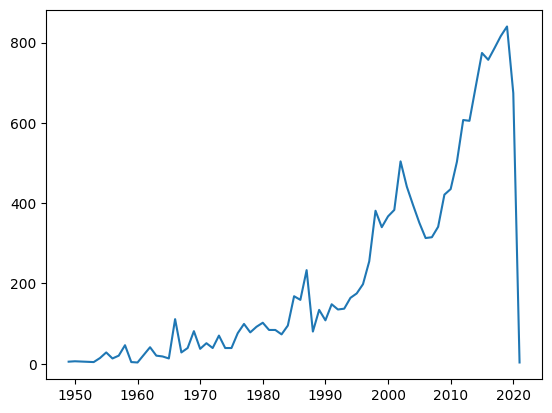

In [18]:
mpl.plot(sets_by_year.index,sets_by_year.set_num)

Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames.

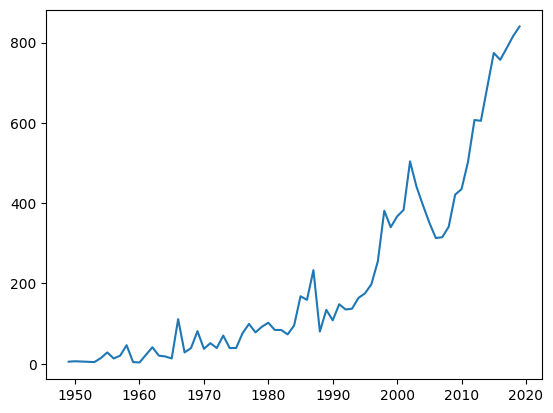

In [19]:
mpl.plot(sets_by_year.index[:-2],sets_by_year.set_num[:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

Below is my version of answer

In [20]:
sets.groupby("year")["theme_id"].nunique()

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


Using **agg()** and also using **rename()**

In [21]:
themes_by_year = sets.groupby("year").agg({'theme_id': pd.Series.nunique})
themes_by_year.rename(columns={'theme_id':'nr_themes'},inplace=True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021).

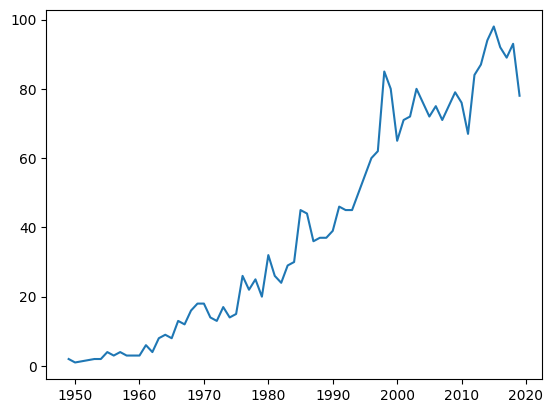

In [22]:
mpl.plot(themes_by_year.index[:-2],themes_by_year.nr_themes[:-2])

### Line Charts with Two Seperate Axes

Wouldn't it be nice to have the **number of themes** and the **number sets** on the **same chart**? But what do we get if we just plot both of them the way we have before?

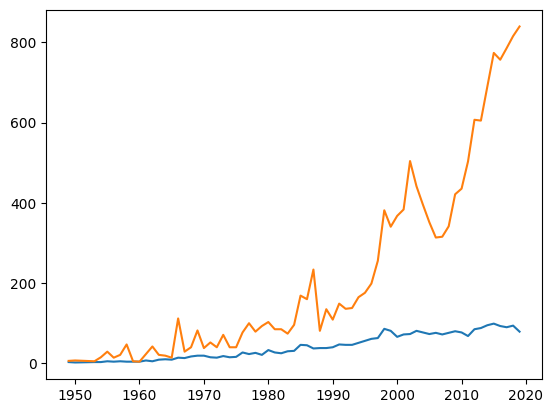

In [23]:
mpl.plot(themes_by_year.index[:-2],themes_by_year.nr_themes[:-2])
mpl.plot(sets_by_year.index[:-2],sets_by_year.set_num[:-2])

Well, that's not very informative! 🤦‍♀️ The problem is that the "number of themes" and the "number of sets" have very different scales. The theme number ranges between **0 and 90**, while the number of sets ranges between **0 and 900**. So what can we do?

We create axis object: **ax1** which holds its current axis by using **.gca()** and We then create another axis object: **ax2**. The key thing is that by using the **.twinx()** method allows ax1 and ax2 to share the **same x-axis**. When we plot our data on the axes objects we get this

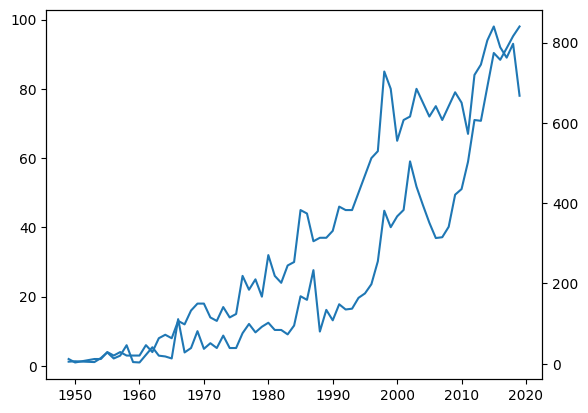

In [24]:
ax1 = mpl.gca() # Get Current Axis.
ax2 = ax1.twinx() # Create another axis that shares same x-axis.

ax1.plot(themes_by_year.index[:-2],themes_by_year.nr_themes[:-2])
ax2.plot(sets_by_year.index[:-2],sets_by_year.set_num[:-2])

That's very nice! But there's one problem: we can't tell the lines apart because they have the same colour! Let's add some styling. Let's:

Text(0, 0.5, 'Number of Themes')

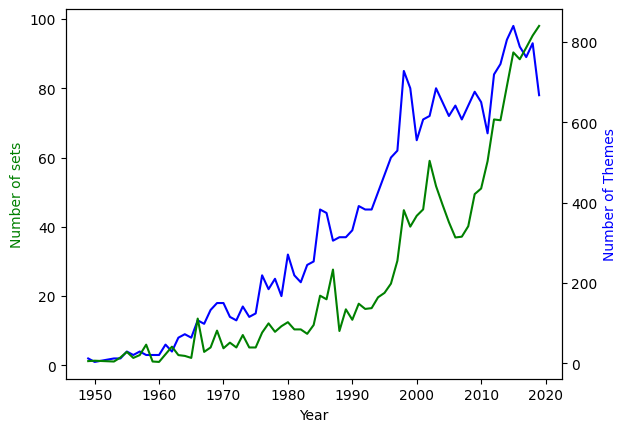

In [25]:
ax1 = mpl.gca() # Get Current Axis.
ax2 = ax1.twinx() # Create another axis that shares same x-axis.

ax1.plot(themes_by_year.index[:-2],themes_by_year.nr_themes[:-2], color='b')
ax2.plot(sets_by_year.index[:-2],sets_by_year.set_num[:-2],color = 'g')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of sets',color='green')
ax2.set_ylabel('Number of Themes',color='blue')

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

My version below:

In [26]:
parts_per_set = sets.groupby('year')['num_parts'].mean()
# parts_per_set.rename(columns={'num_parts':'average num_parts'},inplace=True)
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


Using **groupby()** and **agg()**

In [27]:
parts_per_set = sets.groupby("year").agg({'num_parts': pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart?

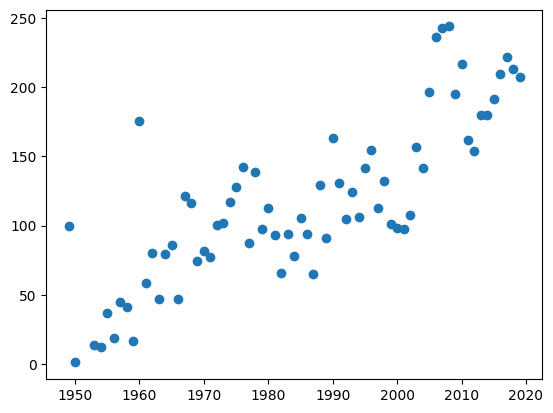

In [28]:
mpl.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?

To count the number of sets per Theme we can use the **.value_counts()** method on our theme_id column. But there's one problem:

In [29]:
set_theme_count = sets["theme_id"].value_counts()
set_theme_count.head()

,count
theme_id,
158,753
501,656
494,398
435,356
503,329


We have no idea what our themes are actually called! 🤨 Ok, we can see that the theme with **id 158** is the largest theme containing 753 individual sets, but what's that theme called? This is not very helpful. We need to find the names of the themes based on the theme_id from the themes.csv file.

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [30]:
themes = pd.read_csv("data/themes.csv")

In [31]:
themes[themes['name']=='Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [32]:
sets[sets.theme_id==18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [33]:
sets[sets.theme_id==158]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [34]:
sets[sets.theme_id==209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


### Merging (i.e., Combining) DataFrames based on a Key


Let's use the .merge() method to combine two separate DataFrames into one. The merge method works on columns with the same name in both DataFrames.

To make sure we have a column with the name id, I'll convert this Pandas Series into a Pandas DataFrame.

In [39]:
# set_theme_count = pd.DataFrame({'id':set_theme_count.index,'set_count':set_theme_count.values}) # Execute once
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


To **.merge()** two DataFrame along a particular column, we need to provide our two DataFrames and then the column name on which to merge. This is why we set ***on='id'***. Both our set_theme_count and our themes DataFrames have a column with this name.

In [41]:
merged_df = pd.merge(set_theme_count,themes,on='id')
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


###Creating a Bar Chart

Matplotlib can create almost any chart imaginable with very few lines of code. Using **.bar()** we can provide our theme names and the number of sets. This is what we get:

<BarContainer object of 10 artists>

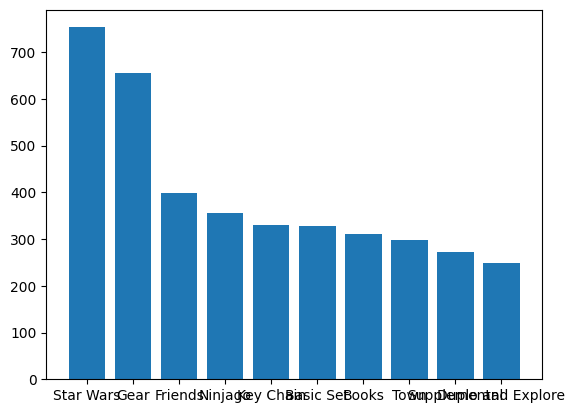

In [43]:
mpl.bar(merged_df.name[:10],merged_df.set_count[:10])

That worked, but it's almost unreadable. 😩 The good thing for us is that we already know how to customize our charts! Here's what we get when we increase the size of our figure, add some labels, and most importantly, rotate the category names on the x-axis so that they don't overlap.

<BarContainer object of 10 artists>

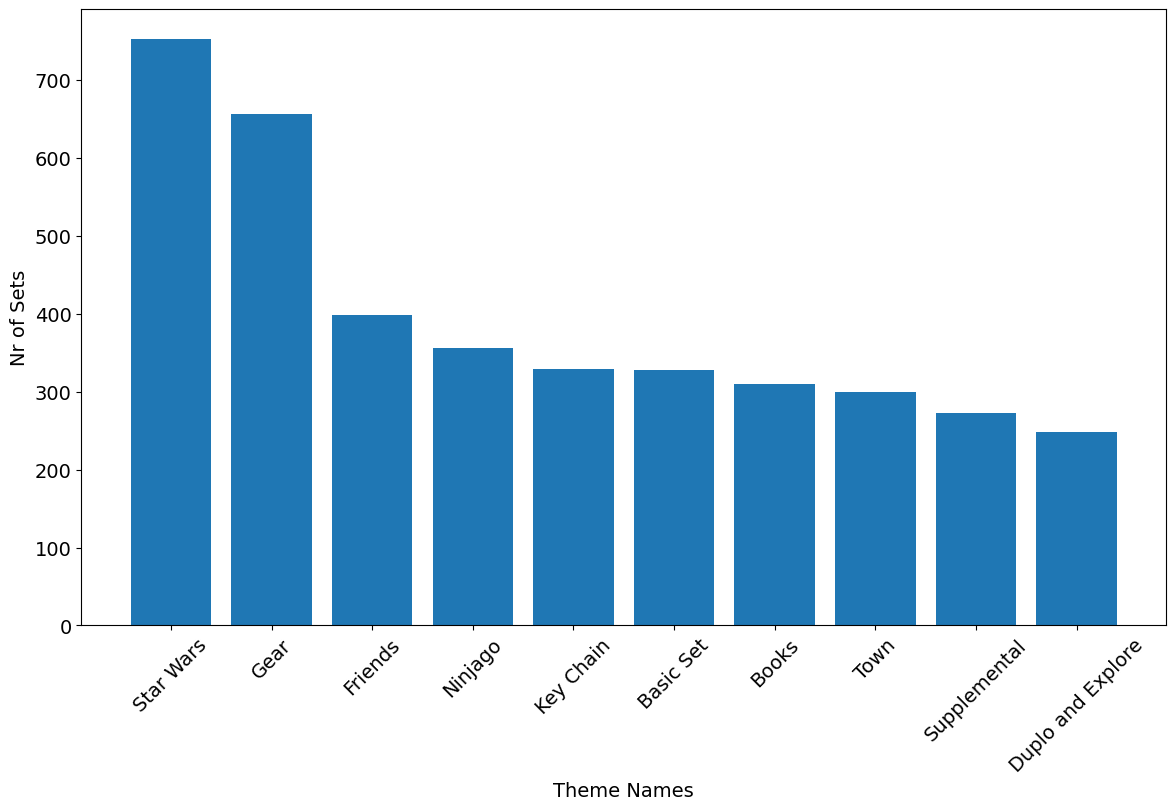

In [45]:
mpl.figure(figsize=(14,8))
mpl.xticks(fontsize=14,rotation=45)
mpl.yticks(fontsize=14)
mpl.xlabel('Theme Names',fontsize=14)
mpl.ylabel('Nr of Sets',fontsize=14)

mpl.bar(merged_df.name[:10], merged_df.set_count[:10])